<a href="https://colab.research.google.com/github/ASWINY/Task-1-Prediction-Using-Supervised-ML/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : The Sparks Foundation**

Data Science and Business Analytics Intern

**Author : ASWINY AR**

Task 1 :Prediction Using Supervised ML
 
Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

Dataset - The dataset is Student Score Dataset.It has two Columns, one contains no.of study hours and the other one contains the marks scored by him.

Model - Linear Regression is a machine learning algorithm based on supervised learning.It is a linear model e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). It shows the relationship between two variables by fitting a line to the observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Here, the study hours is explanatory wheras score is dependent variable. Score is linearly related to the Number of hours a Student Studies.

In [ ]:
#Importing required libraries 
import numpy as np # numerical
import pandas as pd # read data 
import matplotlib.pyplot as plt #graph
import seaborn as sns 
%matplotlib inline

**Importing the Data**

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

**Exploring Data**

In [ ]:
print(data.shape)
 

(25, 2)


Observation

There are 25 rows and two columns. The Independent Variable Column is Hours and the dependent Variable Column is Score

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Observation

1.The average study hours is 5hrs

2.The average score is 51

3.Minimum study hour is 1 and maximum study hours is 7.4hrs

4.Minimum score is 17 and maximum score is 95

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Observation

There are no missing value

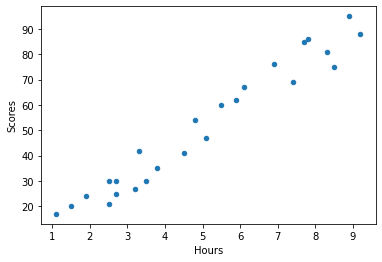

In [ ]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

**Data Pre_Processing**

In [ ]:
x=data['Hours'].values.reshape(-1,1)
print(x)
print(x.shape)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
(25, 1)


In [ ]:
y=data['Scores'].values.reshape(-1,1)
print(y)
print(y.shape)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]
(25, 1)


In [ ]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Observation

There is a positive correlation between study hours and scores

**Visualizing Data**

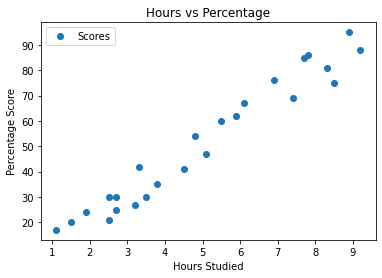

In [ ]:
# Plotting our data points on 2-D graph.

data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Regression Analysis**

Estimated coefficients:
b_0 = 2.4836734053732172 		
b_1 = 9.775803390787466


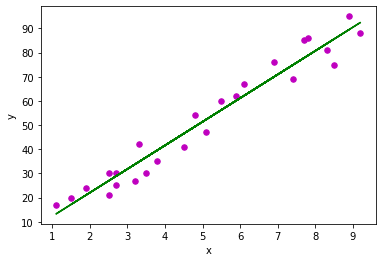

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x=data['Hours'].values.reshape(-1,1)
	y=data['Scores'].values.reshape(-1,1)

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**Making predictions**


Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing the actual y_test set and predicted y_pred data we get
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,predicted,Difference/Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [ ]:
# mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002982


**Mean absolute error : It measures the average magnitude of the errors in a set of predictions, without considering their direction.**

**Q. What will be the predicted score if a student studies for 9.25hr per day?**

In [ ]:
h=9.25
b_0= 2.4836734053732172 		
b_1= 9.775803390787466
s=y_pred = b_0 + b_1*h
("If a student studies for 9.25 hours he/she will score",{s})

('If a student studies for 9.25 hours he/she will score', {92.90985477015727})